## Load librairies

In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



## Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## ignore warnings
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# I. Questions

#### What are the variables that predict diabetes?
#### What are the variables most correlated with each other and/or with diabetes?

# II. Data Collection

In [59]:
## Load data
diabeties_data = pd.read_csv("../Data/diabetes.csv")
diabeties_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
## shape of data
diabeties_data.shape

(768, 9)

In [63]:
## columns of data
diabeties_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
## informations about each column
diabeties_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
## Basics statistics : summarize dataset with descriptives statistics
diabeties_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# III. Data Wraling (cleaning, transformations, etc.)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: >

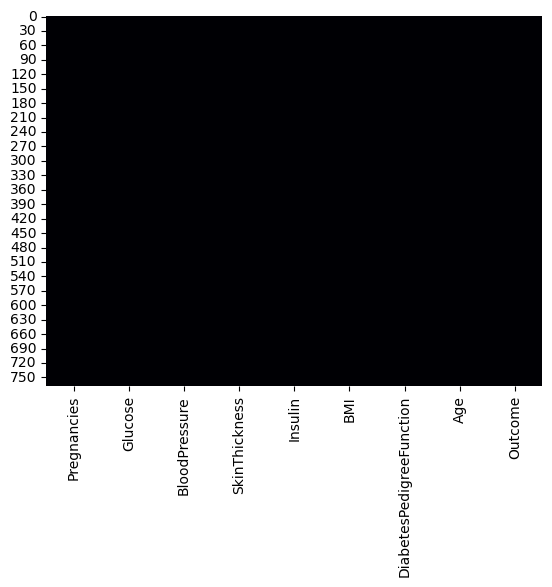

In [69]:
## Missing Values are there?
missing = diabeties_data.isna().sum()
print(missing)

sns.heatmap(diabeties_data.isnull(),cmap = 'magma', cbar = False)

In [71]:
## Duplicated Values are there?
duplicate = diabeties_data.duplicated().sum()
print(duplicate)

0


# IV. Exploration Data Analysis (EDA)

### TARGET : Diabete or not ?

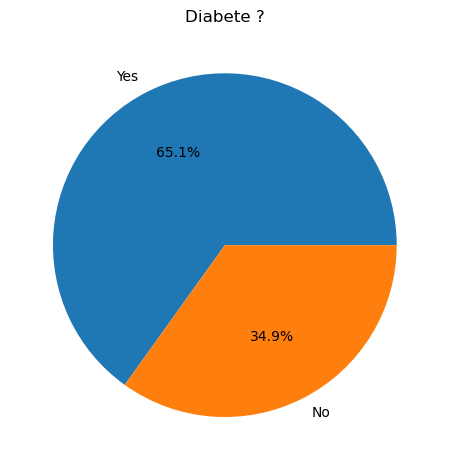

In [73]:
## TARGET : Diabete or not ?
targets = diabeties_data.loc[:, "Outcome"].unique()
numberTargerts = diabeties_data.loc[:, "Outcome"].value_counts().values



## Plot
fig, ax = plt.subplots()

labels = ["Yes", "No"]

ax.pie(numberTargerts, labels = labels, autopct = '%1.1f%%') 
ax.set_title('Diabete ?')


plt.tight_layout()
plt.show()

### Pregnancies

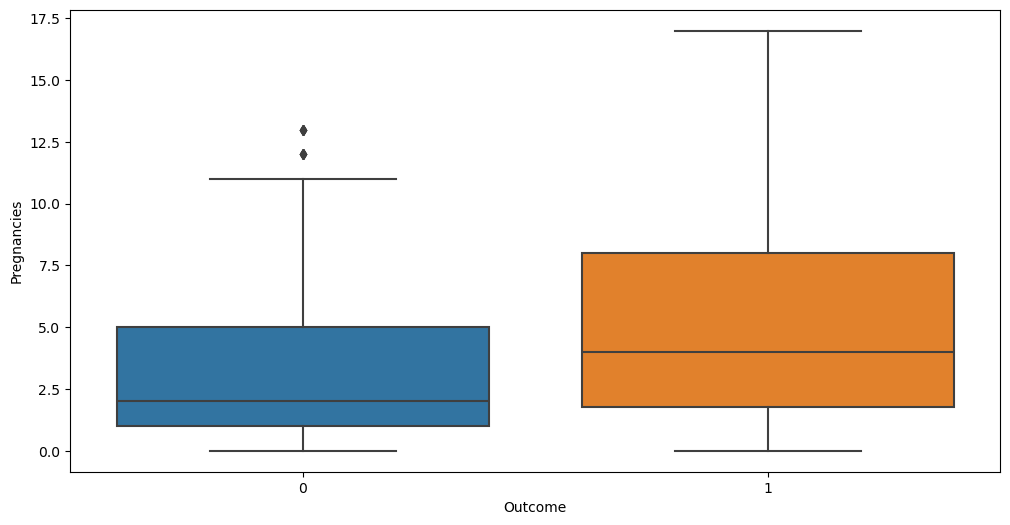

In [75]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=diabeties_data, x="Outcome", y="Pregnancies")

plt.show()

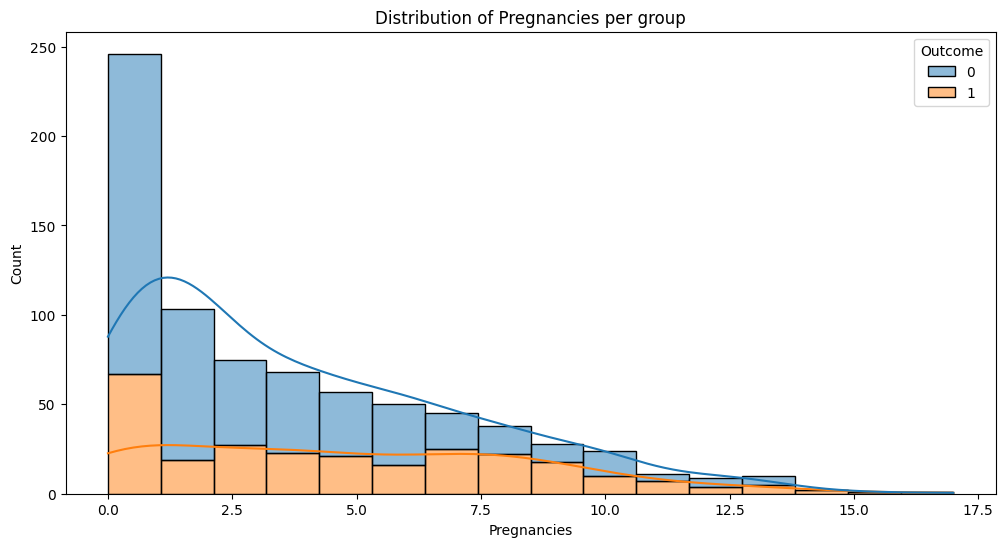

In [11]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.histplot(data=diabeties_data, x="Pregnancies", hue="Outcome", multiple="stack", kde=True)
figure.set_title('Distribution of Pregnancies per group')
plt.show()


### Glucose

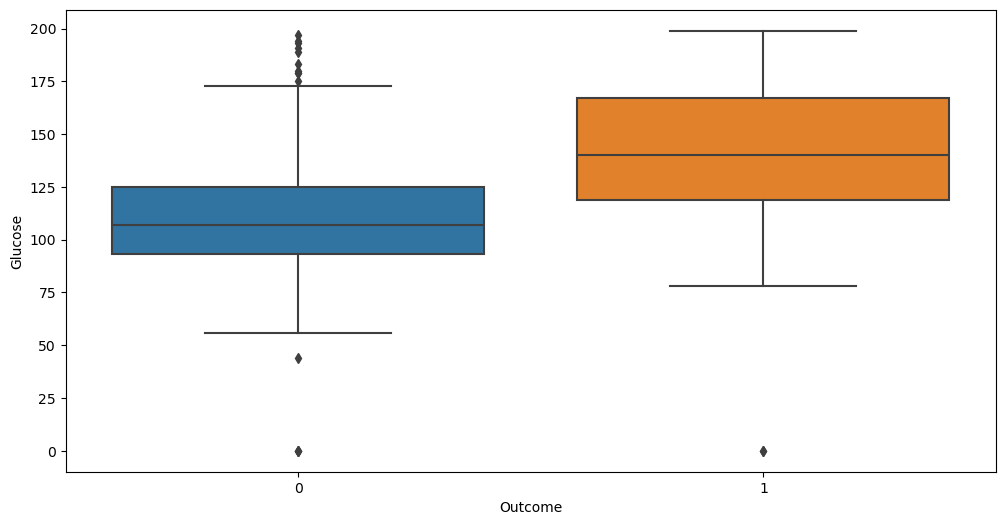

In [77]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=diabeties_data, x="Outcome", y="Glucose")

plt.show()

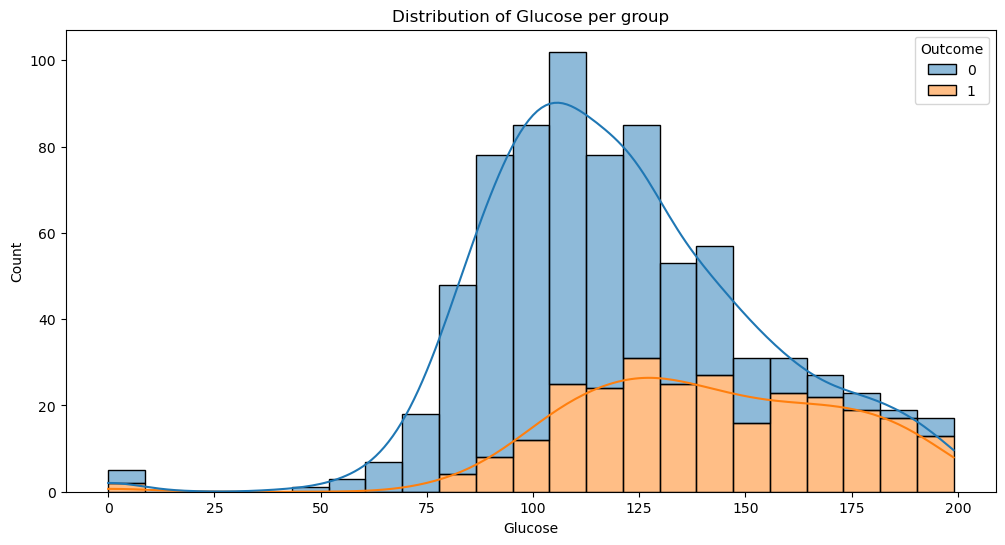

In [81]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.histplot(data=diabeties_data, x="Glucose", hue="Outcome", multiple="stack", kde=True)
figure.set_title('Distribution of Glucose per group')


plt.show()

### BloodPressure

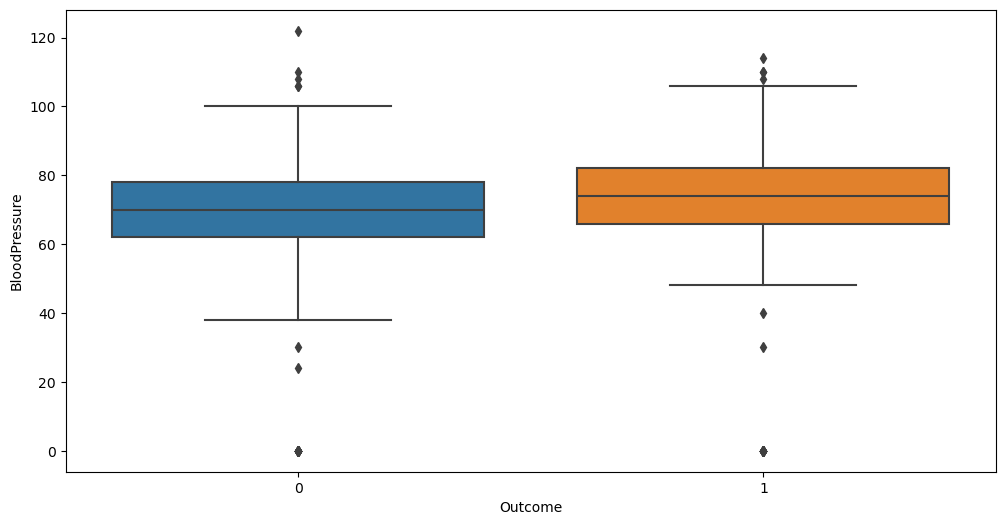

In [85]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=diabeties_data, x="Outcome", y="BloodPressure")

plt.show()

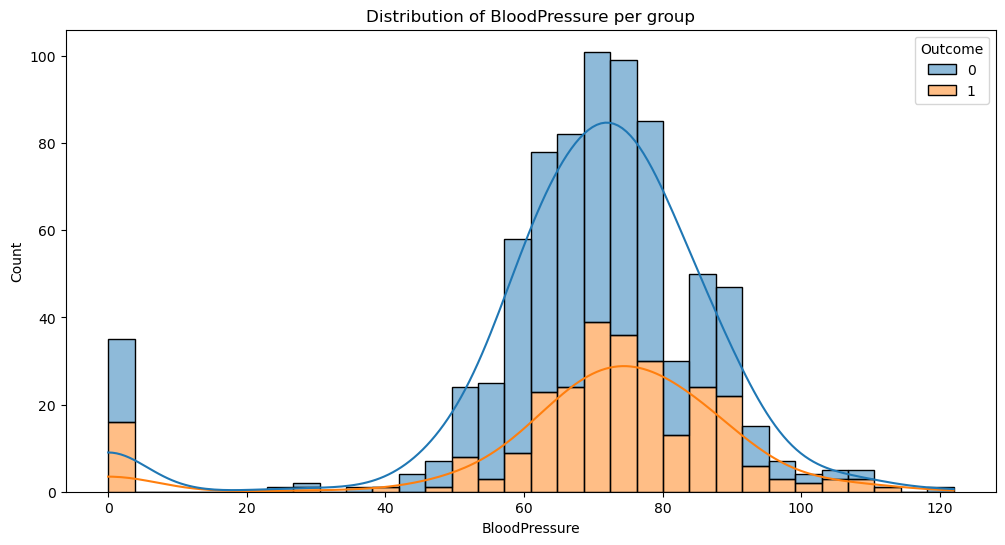

In [87]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.histplot(data=diabeties_data, x="BloodPressure", hue="Outcome", multiple="stack", kde=True)
figure.set_title('Distribution of BloodPressure per group')

plt.show()

### SkinThickness

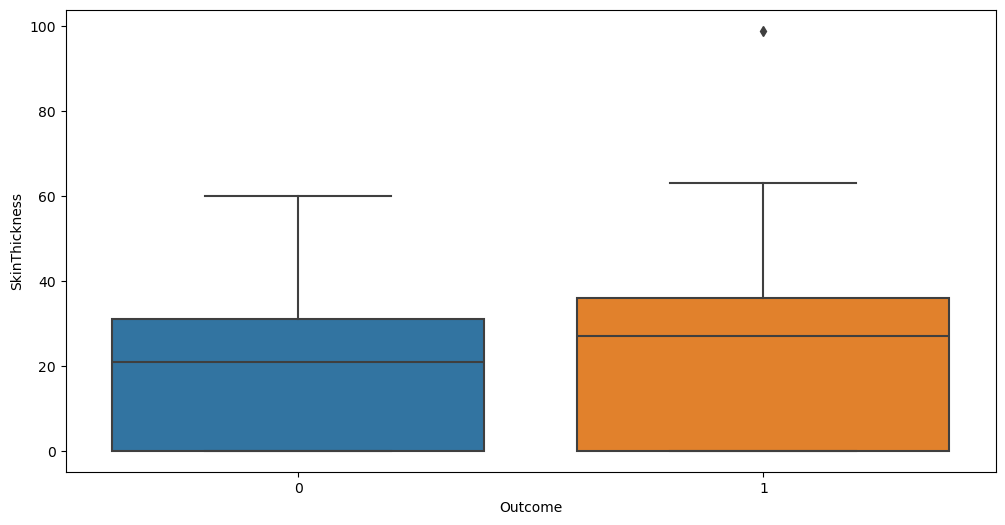

In [89]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=diabeties_data, x="Outcome", y="SkinThickness")

plt.show()

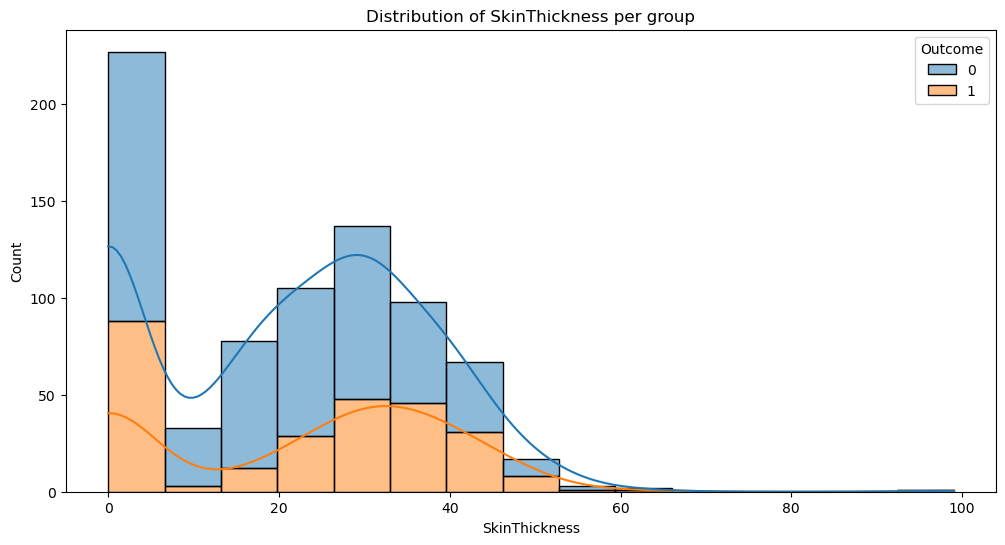

In [91]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.histplot(data=diabeties_data, x="SkinThickness", hue="Outcome", multiple="stack", kde=True)
figure.set_title('Distribution of SkinThickness per group')

plt.show()

### Insulin

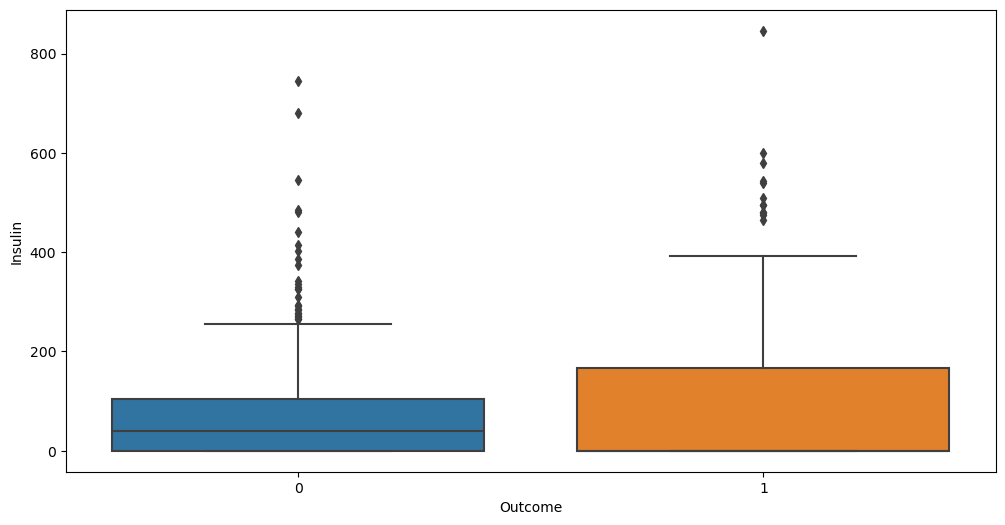

In [93]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=diabeties_data, x="Outcome", y="Insulin")

plt.show()

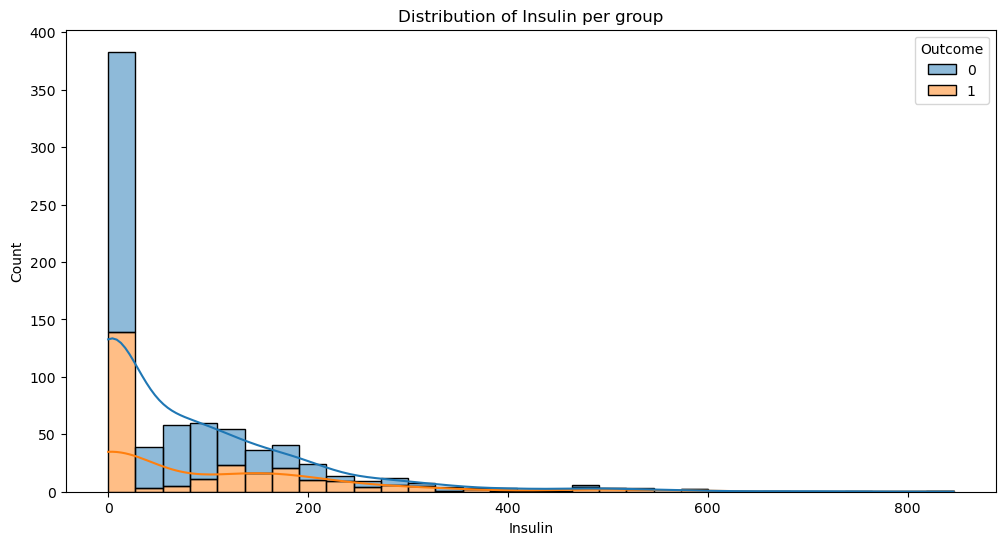

In [95]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.histplot(data=diabeties_data, x="Insulin", hue="Outcome", multiple="stack", kde=True)
figure.set_title('Distribution of Insulin per group')

plt.show()

### BMI

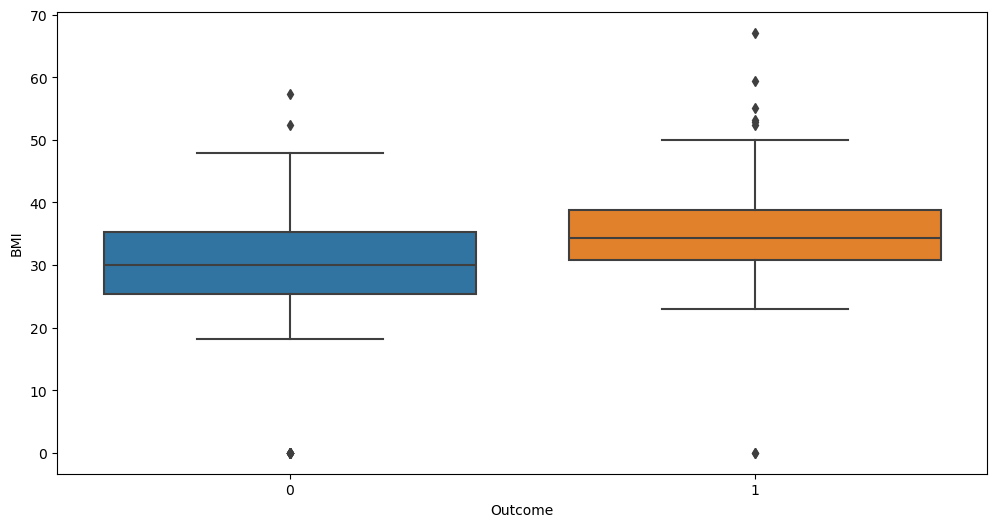

In [97]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=diabeties_data, x="Outcome", y="BMI")

plt.show()

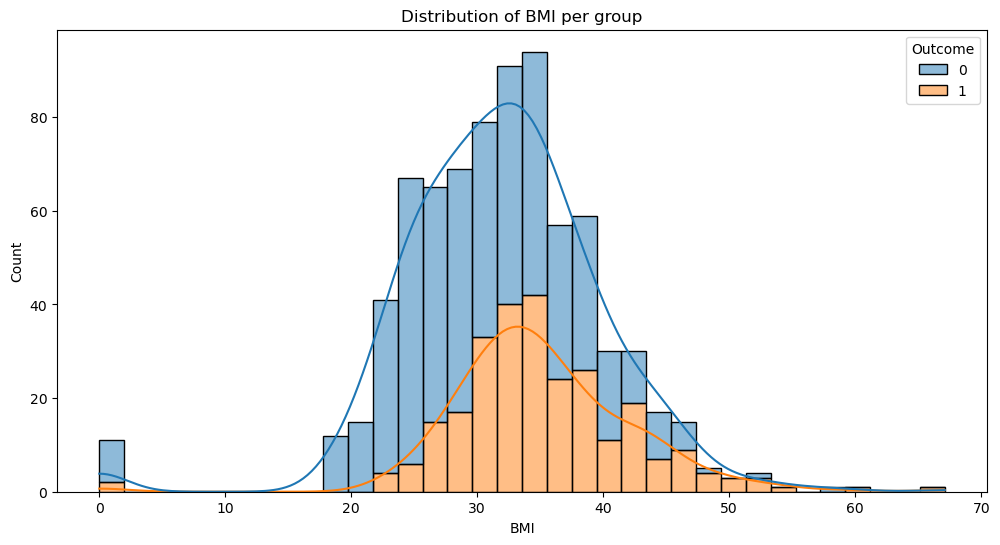

In [99]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.histplot(data=diabeties_data, x="BMI", hue="Outcome", multiple="stack", kde = True)
figure.set_title('Distribution of BMI per group')

plt.show()


### DiabetesPedigreeFunction

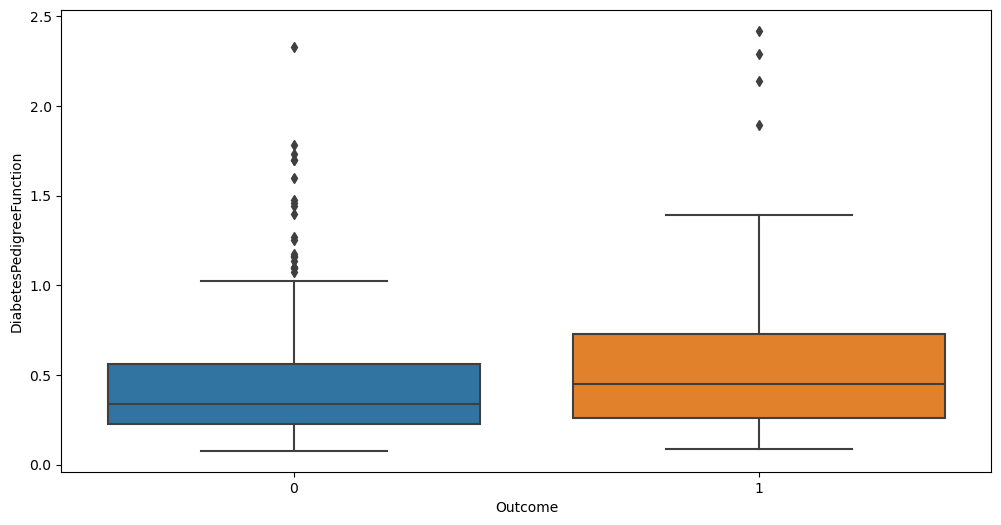

In [101]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=diabeties_data, x="Outcome", y="DiabetesPedigreeFunction")

plt.show()

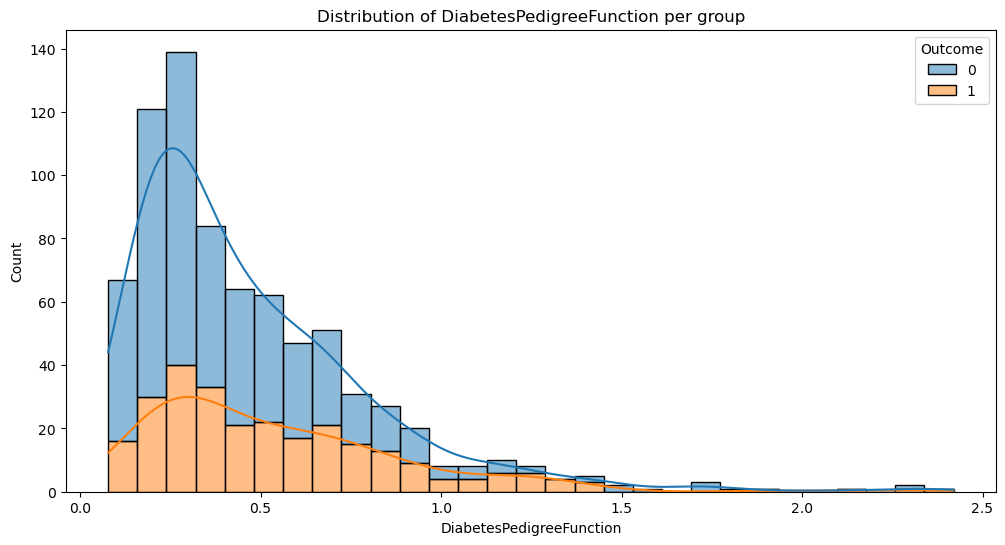

In [49]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.histplot(data=diabeties_data, x="DiabetesPedigreeFunction", hue="Outcome", multiple="stack", kde=True)
figure.set_title('Distribution of DiabetesPedigreeFunction per group')

plt.show()

### Age

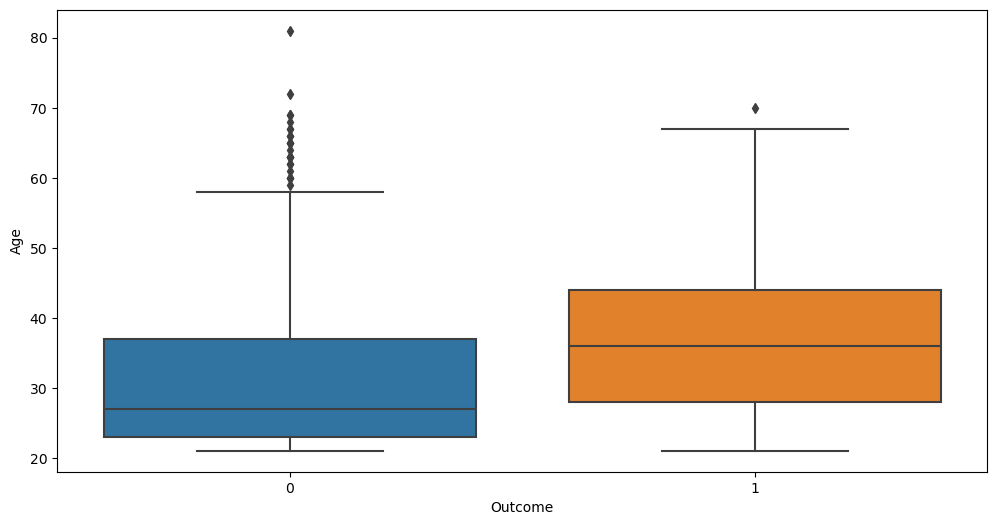

In [103]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=diabeties_data, x="Outcome", y="Age")

plt.show()

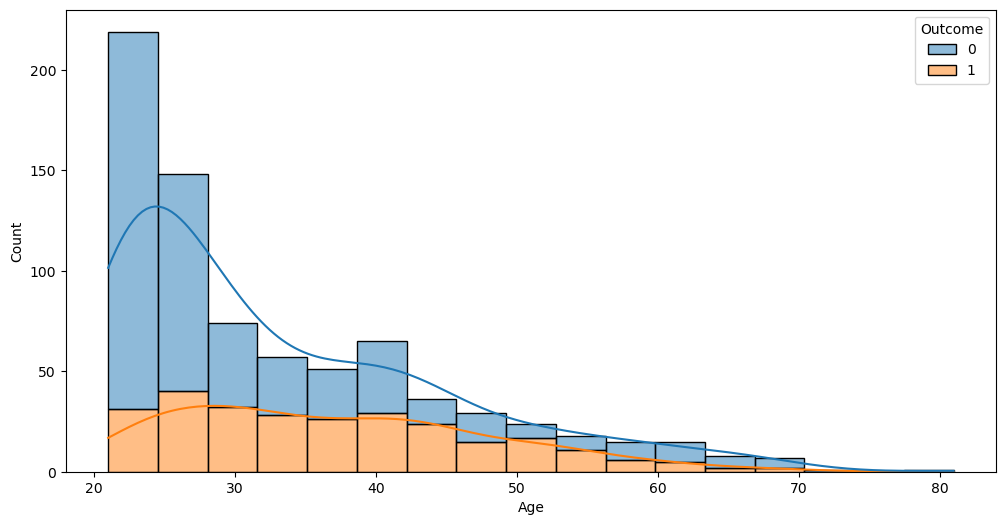

In [105]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.histplot(data=diabeties_data, x="Age", hue="Outcome", multiple="stack", kde=True)

plt.show()

### Correlation among features

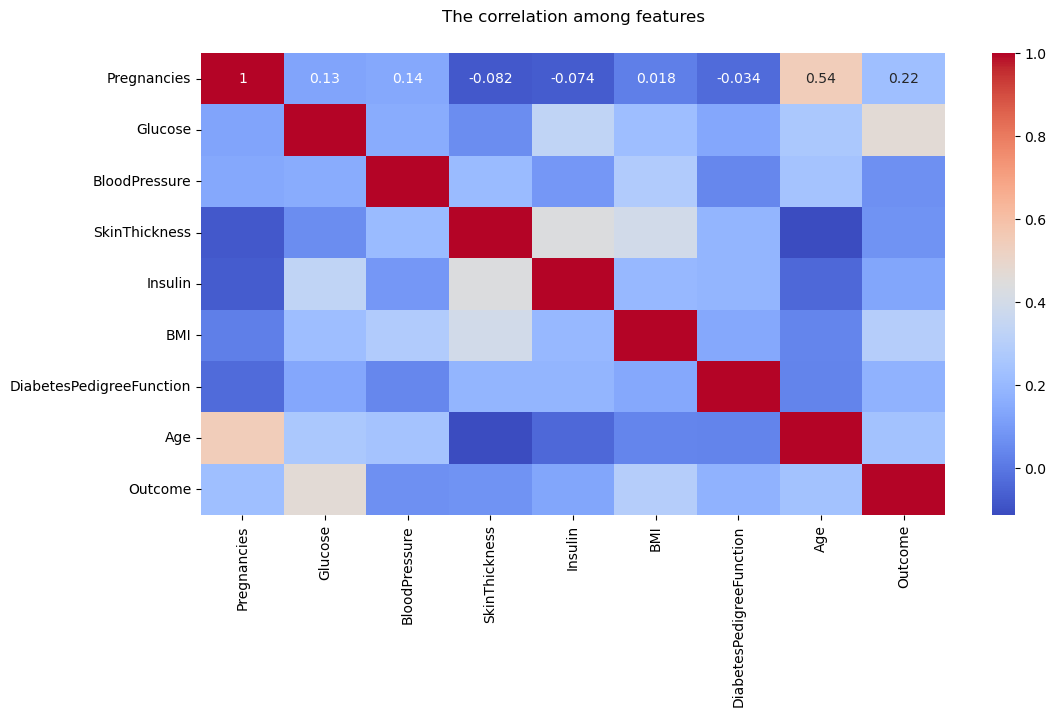

In [107]:
plt.figure(figsize=(12,6))

sns.heatmap(diabeties_data.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

#### Age is correlated to Pregnancies. 
#### Glucose is correlated to outcome.

### Pairplot of features

<Figure size 1200x600 with 0 Axes>

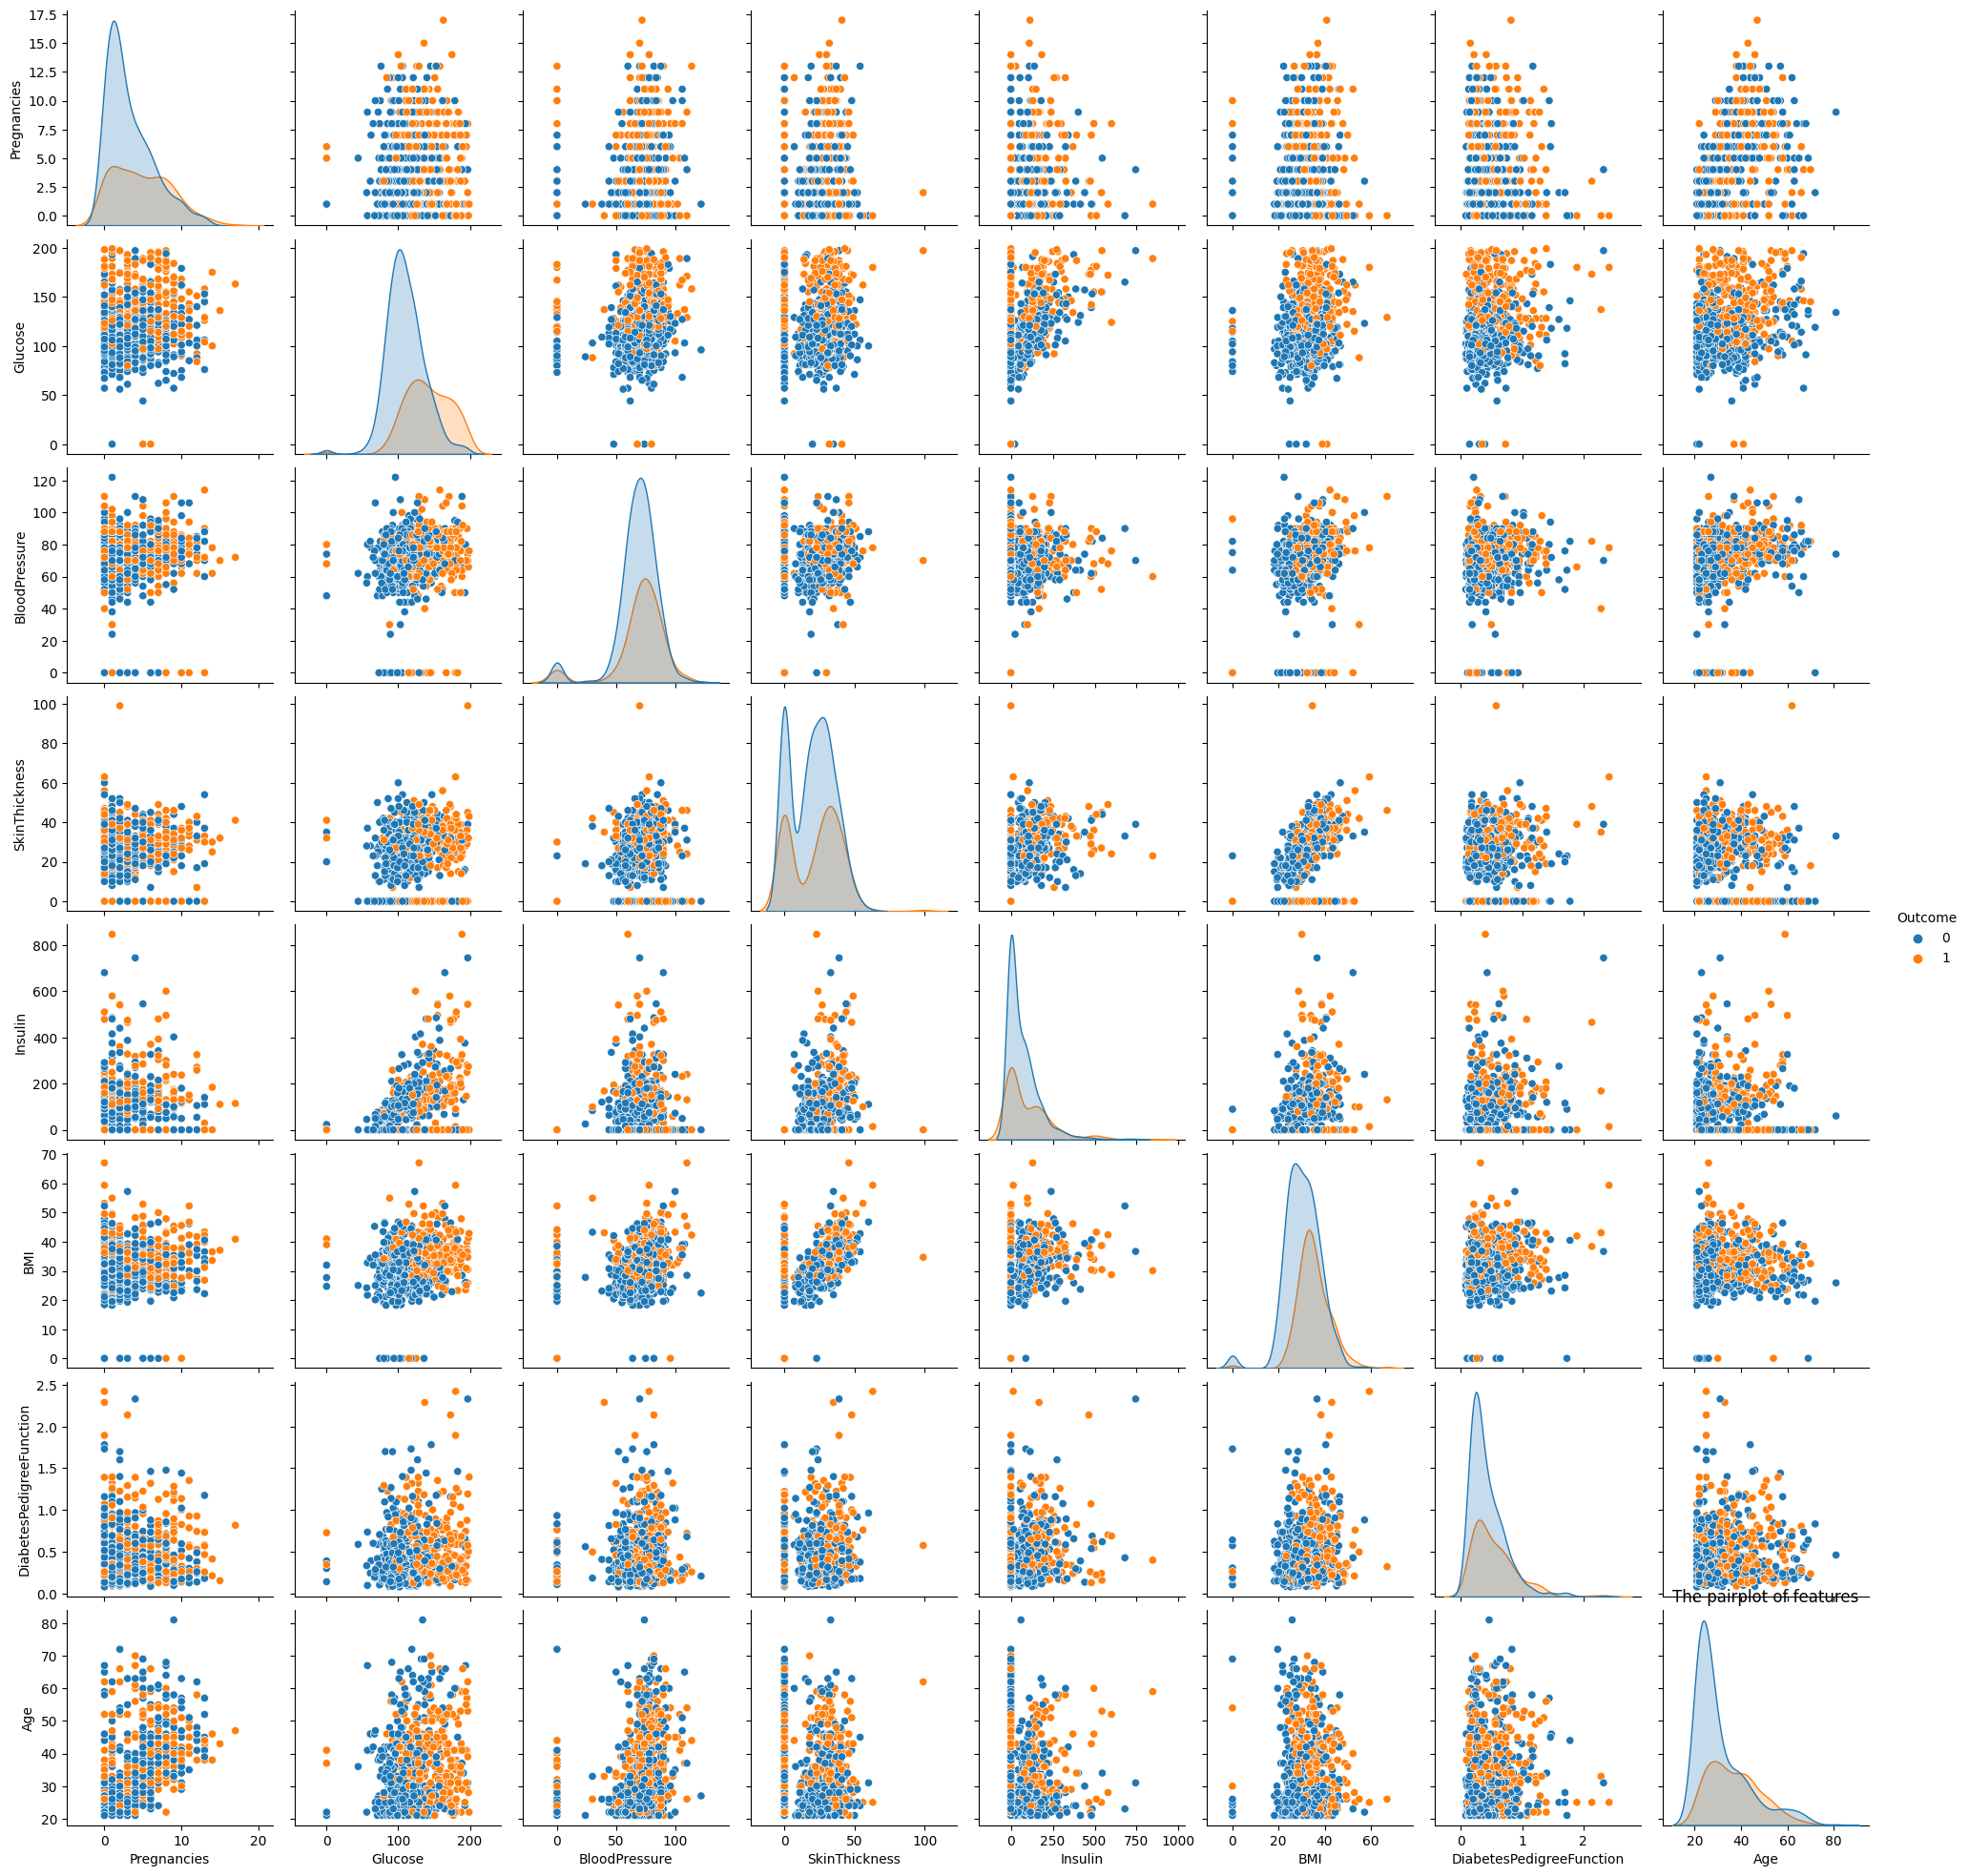

In [27]:
plt.figure(figsize=(12,6))

#sns.heatmap(diabeties_data.corr(), annot = True, cmap = "coolwarm")
sns.pairplot(diabeties_data, hue="Outcome")
plt.title('The pairplot of features')
plt.show()


# V. Data Modeling

### Data Preparation

In [127]:
X = diabeties_data[["Pregnancies", "Glucose","BloodPressure", "Insulin", "BMI", "Age", "SkinThickness", "DiabetesPedigreeFunction" ]]
y = diabeties_data.Outcome

### Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,SkinThickness,DiabetesPedigreeFunction
603,7,150,78,126,35.2,54,29,0.692
118,4,97,60,0,28.2,22,23,0.443
247,0,165,90,680,52.3,23,33,0.427
157,1,109,56,135,25.2,23,21,0.833
468,8,120,0,0,30.0,38,0,0.183


## Machine Learning models

### 1. Logistic Regression

In [129]:
model = LogisticRegression(random_state=0, max_iter = 100)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

output = pd.DataFrame({'Candidats': X_test.index, 'Outcome': predictions})


accuracy = accuracy_score(y_test, predictions)
print("Accuracy score of Logistic Regression model : ", accuracy)
output

Accuracy score of Logistic Regression model :  0.8246753246753247


,Candidats,Outcome
0,661,1
1,122,0
2,113,0
3,14,1
4,529,0
...,...,...
149,476,0
150,482,0
151,230,1
152,527,0


In [131]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



## 2. Random Forest

In [133]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

output = pd.DataFrame({'Candidats': X_test.index, 'Outcome': predictions})


accuracy = accuracy_score(y_test, predictions)
print("Accuracy score of Random Forest model : ", accuracy)
output

Accuracy score of Random Forest model :  0.8116883116883117


,Candidats,Outcome
0,661,1
1,122,0
2,113,0
3,14,1
4,529,0
...,...,...
149,476,0
150,482,0
151,230,0
152,527,0


In [135]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       107
           1       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154



### 3. K Nearest Neighbors

In [137]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

output = pd.DataFrame({'Candidats': X_test.index, 'Outcome': predictions})


accuracy = accuracy_score(y_test, predictions)
print("Accuracy score of K Nearest Neighbors model : ", accuracy)
output

Accuracy score of K Nearest Neighbors model :  0.7532467532467533


,Candidats,Outcome
0,661,1
1,122,0
2,113,0
3,14,1
4,529,0
...,...,...
149,476,0
150,482,0
151,230,0
152,527,0


In [139]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



> Logistic Regression Model performs best with 82% of accuracy.